In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In time series analysis, ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) are tools used to understand the relationship between observations in a time series.

**Autocorrelation Function (ACF)**

ACF measures the correlation between observations at different lags. For example, it tells us how current values are related to past values.

**Partial Autocorrelation Function (PACF)**

PACF measures the correlation between observations at different lags, controlling for the values of the time series at all shorter lags. It shows the direct relationship between an observation and a lagged observation.

In [2]:
# Generate a simple time series
time_series = np.random.randn(100)

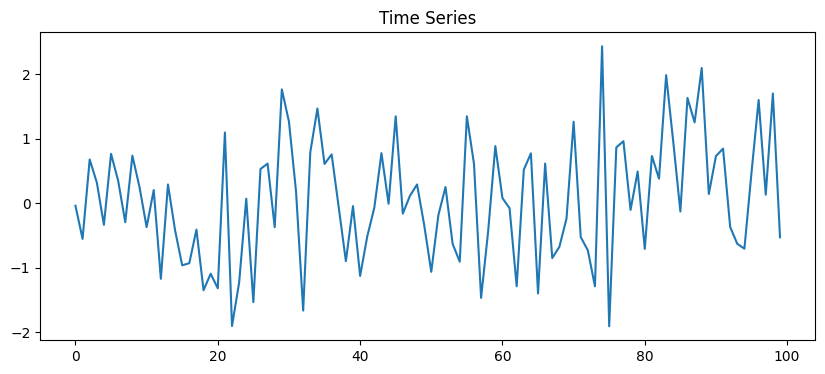

In [3]:
# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(time_series)
plt.title("Time Series")
plt.show()

<Figure size 1000x400 with 0 Axes>

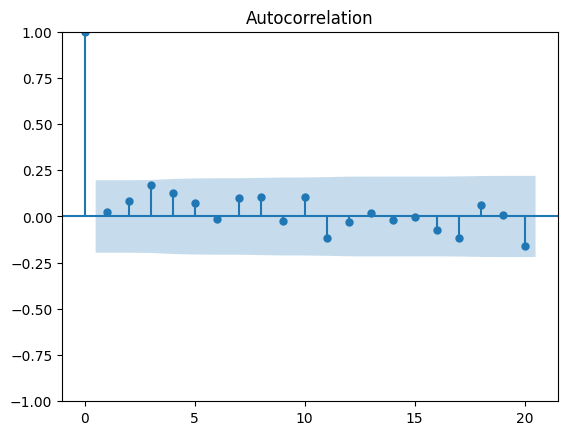

In [4]:
# Plot ACF
plt.figure(figsize=(10, 4))
plot_acf(time_series, lags=20)
plt.show()

**ACF Plot:** The ACF plot shows how the time series is correlated with its past values. Peaks at certain lags indicate significant correlation at those lags.

<Figure size 1000x400 with 0 Axes>

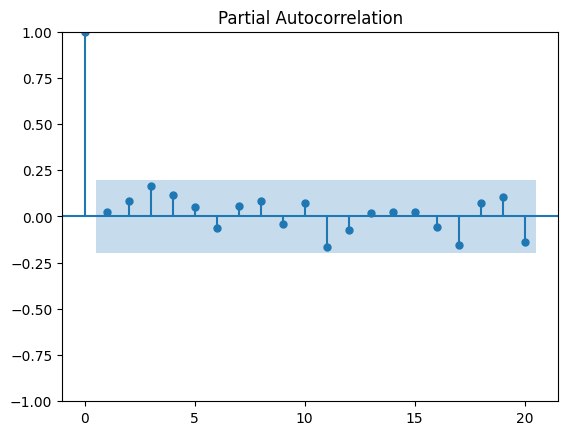

In [5]:
# Plot PACF
plt.figure(figsize=(10, 4))
plot_pacf(time_series, lags=20)
plt.show()

**PACF Plot:** The PACF plot shows the correlation of the time series with its past values, removing the influence of shorter lags. This helps identify the direct effect of past values on the current value.

**Interpretation**

**ACF Plot:** If you see significant peaks at lag 1, 2, etc., it indicates the series is correlated with its past values at those lags.

**PACF Plot:** If you see significant peaks at certain lags, it indicates a direct correlation with those lags, after removing the influence of shorter lags.

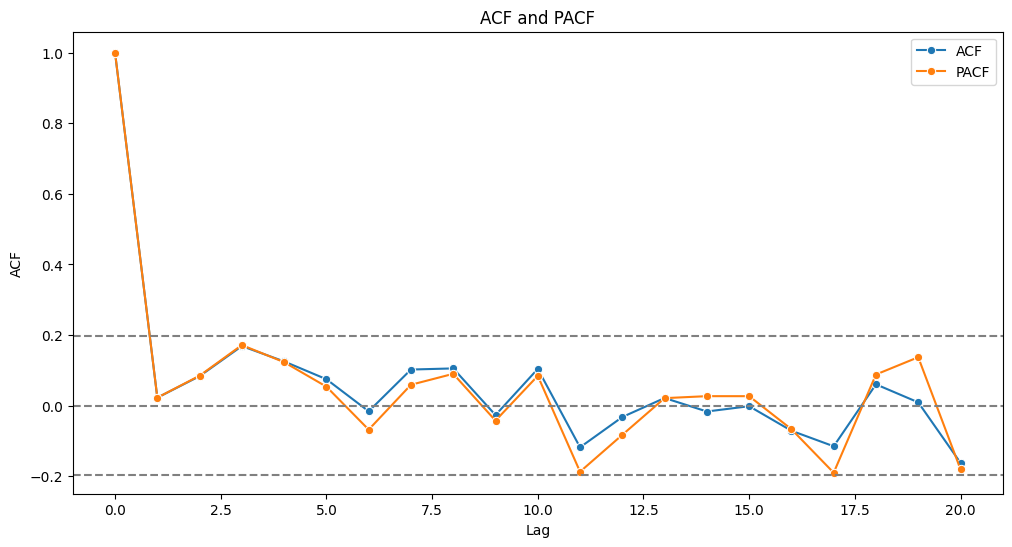

In [6]:
# Calculate ACF and PACF
acf_values = acf(time_series, nlags=20)
pacf_values = pacf(time_series, nlags=20)

# Create a DataFrame for plotting
lags = np.arange(21)
data = pd.DataFrame({'Lag': lags, 'ACF': acf_values, 'PACF': pacf_values})

# Plot ACF and PACF in the same chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Lag', y='ACF', data=data, marker='o', label='ACF')
sns.lineplot(x='Lag', y='PACF', data=data, marker='o', label='PACF')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(time_series)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(time_series)), linestyle='--', color='gray')
plt.title('ACF and PACF')
plt.legend()
plt.show()

PACF removes the indirect correlations seen in ACF, highlighting only the direct effects.